# Time Series Clustering with K-Means and Euclidean Distance Matrix for total (n2)


This notebook provides a base clustering for ordinary and scripted trips together without feature engineering and K-Means with k=3. k=3 follows the naive assumption that the cluster structure is only influenced by the labels. 

We found that there are the following problems with this base line approach:
- Mode "METRO" and "TRAM" are not clustered distinctly
- Mode "WALK" has too many clusters
- We have to cut more than 30 seconds from the scripted trips during preprocessing

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv
import numpy as np
import pandas as pd
#Visualisation Libraries
%matplotlib inline
# Uncomment if you want interactive 3D plots --> does not work in the github rendering
#%matplotlib notebook
from copy import deepcopy

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport visualization.visualize
from visualization.visualize import get_color_encoding
from visualization.visualize import plot_timeseries_clustering
from visualization.visualize import get_plot_timeseries_clustering_variables
%aimport data.preprocessing
from data.preprocessing import Preprocessor
%aimport data.download
from data.download import DatasetDownloader
%aimport utils.utilities
from utils.utilities import get_cluster_labels

%aimport models.cluster
from models.cluster import get_clustering_performance

In [2]:
data_dir = os.path.join(os.path.abspath(DatasetDownloader.get_data_dir()))
file_path = os.path.join(data_dir, "preprocessed","preprocessed_data.dat")
dfs = Preprocessor.restore_preprocessed_data_from_disk(file_path)

In [3]:
trips_cut_per_30_sec = Preprocessor.get_cut_trip_snippets_for_targets(dfs, ["total"])
df_trips_cut_per_30_sec = trips_cut_per_30_sec[0]
euclidean_distances = Preprocessor.calculate_distance_for_n2(df_trips_cut_per_30_sec, metric="correlation")


In [4]:
print(euclidean_distances.shape)
euclidean_distances.head(5)

(1684, 1689)


distance_0  distance_1    distance_2    distance_3    distance_4  \
0  1.110223e-16    1.010913  1.075043e+00  9.803383e-01  9.577748e-01   
1  1.010913e+00    0.000000  1.049361e+00  1.010032e+00  1.053392e+00   
2  1.075043e+00    1.049361 -6.661338e-16  1.030600e+00  1.010667e+00   
3  9.803383e-01    1.010032  1.030600e+00  5.551115e-16  9.976034e-01   
4  9.577748e-01    1.053392  1.010667e+00  9.976034e-01 -2.220446e-16   

   distance_5  distance_6  distance_7  distance_8  distance_9   ...     \
0    1.032918    1.015853    0.915627    1.078899    0.981185   ...      
1    1.003137    1.019007    1.023902    0.983925    0.991463   ...      
2    1.019731    0.953938    1.018995    1.015783    0.947305   ...      
3    0.922904    1.042867    1.039672    1.011566    0.959759   ...      
4    1.044200    1.062220    0.970549    0.916121    0.981531   ...      

   distance_1679  distance_1680  distance_1681  distance_1682  distance_1683  \
0       1.019394       0.976978       0.994815       1.010580       1.022918   
1       0.942525       0.963539       0.917212       1.083303       1.019424   
2       0.960321       1.048419       1.011782       0.930169       1.011784   
3       1.000570       1.006951       1.018121       1.004538       1.014831   
4       1.049099       1.041807       0.911939       1.021273       0.983154   

   mode      notes  scripted            token  trip_id  
0  TRAM  scripted          1  355007075245007        0  
1  TRAM  scripted          1  355007075245007        0  
2  TRAM  scripted          1  355007075245007        0  
3  TRAM  scripted          1  355007075245007        0  
4  TRAM  scripted          1  355007075245007        0  

[5 rows x 1689 columns]

In [5]:
categorical_columns = ["mode","notes","scripted","token","trip_id"]

trips_only = euclidean_distances.drop(categorical_columns,axis=1)
print(trips_only.shape)
trips_only.head(5)

(1684, 1684)


distance_0  distance_1    distance_2    distance_3    distance_4  \
0  1.110223e-16    1.010913  1.075043e+00  9.803383e-01  9.577748e-01   
1  1.010913e+00    0.000000  1.049361e+00  1.010032e+00  1.053392e+00   
2  1.075043e+00    1.049361 -6.661338e-16  1.030600e+00  1.010667e+00   
3  9.803383e-01    1.010032  1.030600e+00  5.551115e-16  9.976034e-01   
4  9.577748e-01    1.053392  1.010667e+00  9.976034e-01 -2.220446e-16   

   distance_5  distance_6  distance_7  distance_8  distance_9      ...        \
0    1.032918    1.015853    0.915627    1.078899    0.981185      ...         
1    1.003137    1.019007    1.023902    0.983925    0.991463      ...         
2    1.019731    0.953938    1.018995    1.015783    0.947305      ...         
3    0.922904    1.042867    1.039672    1.011566    0.959759      ...         
4    1.044200    1.062220    0.970549    0.916121    0.981531      ...         

   distance_1674  distance_1675  distance_1676  distance_1677  distance_1678  \
0       1.010562       0.954549       0.980460       0.994156       1.007603   
1       1.016173       0.951390       1.024992       1.007187       0.897059   
2       1.033207       1.125273       0.976341       0.971994       1.051298   
3       0.975874       0.889652       0.973781       0.998037       1.018998   
4       1.006838       0.936265       1.028565       0.928990       0.904185   

   distance_1679  distance_1680  distance_1681  distance_1682  distance_1683  
0       1.019394       0.976978       0.994815       1.010580       1.022918  
1       0.942525       0.963539       0.917212       1.083303       1.019424  
2       0.960321       1.048419       1.011782       0.930169       1.011784  
3       1.000570       1.006951       1.018121       1.004538       1.014831  
4       1.049099       1.041807       0.911939       1.021273       0.983154  

[5 rows x 1684 columns]

------
## Create Base Model with Euclidean Distance and K-Means Clustering

In [6]:
from sklearn.cluster import KMeans
random_state = 0

#Naive asumption of 3 clusters due to 3 labels Walk, Metro and Tram 
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(trips_only)
cluster_labels = kmeans.labels_
euclidean_distances["cluster_labels"]=cluster_labels

### Summary Statistics for KMeans Clustering:

Here the performance is evaluated in regard to the "true labels" which here corresponds to the transport mode.

In [7]:
# how well does it capture the label information

get_clustering_performance(trips_only, cluster_labels,
                           true_labels=euclidean_distances["mode"])

['Estimated number of clusters: 3',
 'True number of clusters: 3',
 'Homogeneity: 0.093',
 'Completeness: 0.069',
 'V-measure: 0.079',
 'Adjusted MI: 0.068',
 'Silhouette Coefficient: 0.117']

In [8]:
# Uncomment if you want to explore full dataframe
#with pd.option_context('display.max_rows', None):
#    display(scripted_trips[scripted_trips["scripted"]==0])

## Visualise clustering result for one specific trip

Select one trip:

In [9]:
selected_trip = 51
small_df_trip = euclidean_distances[euclidean_distances.trip_id == selected_trip]
small_df_trip.head()

distance_0  distance_1  distance_2  distance_3  distance_4  distance_5  \
1189    0.929741    1.009917    1.045091    1.039909    1.083525    0.942643   
1190    1.026310    0.998037    0.950301    1.071816    1.017227    0.934373   
1191    1.000073    1.017997    0.964183    1.067858    0.986116    0.994319   
1192    1.031746    1.060654    0.993895    0.965125    0.975893    0.959372   
1193    1.000084    1.011511    1.007532    0.948374    0.967962    0.928285   

      distance_6  distance_7  distance_8  distance_9       ...        \
1189    0.933913    1.017956    1.026988    1.011733       ...         
1190    0.972204    1.014654    0.981112    1.011803       ...         
1191    0.969237    1.024184    1.020839    0.956351       ...         
1192    0.966249    1.008417    1.076392    0.965022       ...         
1193    1.083869    1.075257    1.032246    0.912688       ...         

      distance_1680  distance_1681  distance_1682  distance_1683  mode  \
1189       1.010965       1.067089       1.013481       1.003458  WALK   
1190       1.051715       0.998664       0.987621       0.939743  WALK   
1191       1.066875       1.014462       1.046526       1.006861  WALK   
1192       0.979258       0.946219       1.042058       1.009146  WALK   
1193       0.979027       0.936484       1.002771       0.964193  WALK   

                notes  scripted            token  trip_id  cluster_labels  
1189  ordinary u2_uni         0  868049020858898       51               2  
1190  ordinary u2_uni         0  868049020858898       51               2  
1191  ordinary u2_uni         0  868049020858898       51               2  
1192  ordinary u2_uni         0  868049020858898       51               2  
1193  ordinary u2_uni         0  868049020858898       51               2  

[5 rows x 1690 columns]

First, make sure that cut trips and original trips are the same by checking the first values in the total column

In [10]:
df_trips_cut_per_30_sec[df_trips_cut_per_30_sec.trip_id == selected_trip].head(1)

snippet_0 snippet_1 snippet_2 snippet_3 snippet_4 snippet_5 snippet_6  \
1189   10.8874   10.7438   10.1665   9.31484   9.73353   9.25512   9.19907   

     snippet_7 snippet_8 snippet_9   ...   snippet_595 snippet_596  \
1189   9.47669   9.87503   9.96864   ...         11.84     13.8939   

     snippet_597 snippet_598 snippet_599  mode            notes scripted  \
1189     10.3064     6.94785     4.20767  WALK  ordinary u2_uni        0   

                token trip_id  
1189  868049020858898      51  

[1 rows x 605 columns]

In [11]:
trips_unpacked = Preprocessor.unpack_all_trips(dfs)
acceleration_data_trip = trips_unpacked[selected_trip]["sensor"]
acceleration_data_trip = deepcopy(acceleration_data_trip[acceleration_data_trip.sensor == "acceleration"])
# Important, because indices are not unique
acceleration_data_trip = acceleration_data_trip.reset_index(drop=True)

acceleration_data_trip.head()

time      total         x         y          z  \
0 2017-11-30 06:46:28.301  10.887352 -1.193619  4.426884   9.874837   
1 2017-11-30 06:46:28.346  10.743839 -1.381977  3.675663  10.000486   
2 2017-11-30 06:46:28.396  10.166497 -1.587668  3.470522   9.422974   
3 2017-11-30 06:46:28.446   9.314836 -0.738598  3.617234   8.551974   
4 2017-11-30 06:46:28.496   9.733534 -0.449629  3.164211   9.193873   

         sensor  
0  acceleration  
1  acceleration  
2  acceleration  
3  acceleration  
4  acceleration

During the cutting process the last segments which are less than 30 seconds are dropped, thats why we have to drop them in the original dataframe as well:

In [12]:
labels = get_cluster_labels(small_df_trip["cluster_labels"])
diff = acceleration_data_trip.shape[0] - len(labels)
rows_to_be_dropped = acceleration_data_trip.tail(diff).index
acceleration_data_trip = acceleration_data_trip.drop(rows_to_be_dropped)
acceleration_data_trip["cluster_labels"]= labels
acceleration_data_trip.head()

time      total         x         y          z  \
0 2017-11-30 06:46:28.301  10.887352 -1.193619  4.426884   9.874837   
1 2017-11-30 06:46:28.346  10.743839 -1.381977  3.675663  10.000486   
2 2017-11-30 06:46:28.396  10.166497 -1.587668  3.470522   9.422974   
3 2017-11-30 06:46:28.446   9.314836 -0.738598  3.617234   8.551974   
4 2017-11-30 06:46:28.496   9.733534 -0.449629  3.164211   9.193873   

         sensor  cluster_labels  
0  acceleration               2  
1  acceleration               2  
2  acceleration               2  
3  acceleration               2  
4  acceleration               2

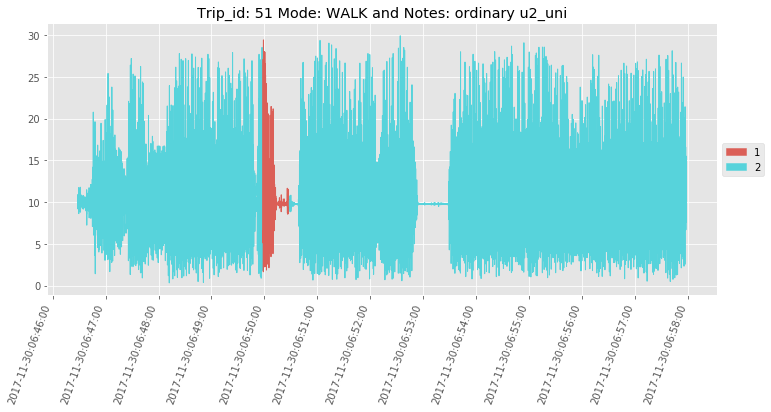

In [13]:
mode = trips_unpacked[selected_trip]["annotation"]["mode"][0]
notes = trips_unpacked[selected_trip]["annotation"]["notes"][0]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Trip_id: {} Mode: {} and Notes: {}".format(selected_trip, mode,notes))
plot_timeseries_clustering(acceleration_data_trip["time"],acceleration_data_trip["total"], acceleration_data_trip["cluster_labels"], ax=ax)

## Plot the distribution of modes to cluster label for all trips

From this we can see that it the clustering is not distinct between "WALK" and "TRAM"

In [14]:
def get_distribution_of_cluster_labels_for(target, distance_matrix):
    column_names = ["count_cluster_"+str(i) for i in np.sort(distance_matrix["cluster_labels"].unique())]
    column_names += [target]
    dist_df = pd.DataFrame(columns=column_names)
    # Collect cluster counts per mode
    for index, target_value in enumerate(distance_matrix[target].unique()):
        distance_per_target_value = distance_matrix[distance_matrix[target]==target_value]
        dist_df.loc[index,target]=target_value
        cluster_label_dist = distance_per_target_value.groupby("cluster_labels").count()[target]
        for cluster_id, label_count in cluster_label_dist.iteritems():
                dist_df.loc[index,"count_cluster_"+str(cluster_id)]=label_count

        dist_df.fillna(0,inplace=True)

    return dist_df

mode_dist_df = get_distribution_of_cluster_labels_for("mode", euclidean_distances)
mode_dist_df

count_cluster_0  count_cluster_1  count_cluster_2   mode
0            117.0            117.0            328.0   TRAM
1             36.0             24.0            614.0   WALK
2             92.0            104.0            252.0  METRO

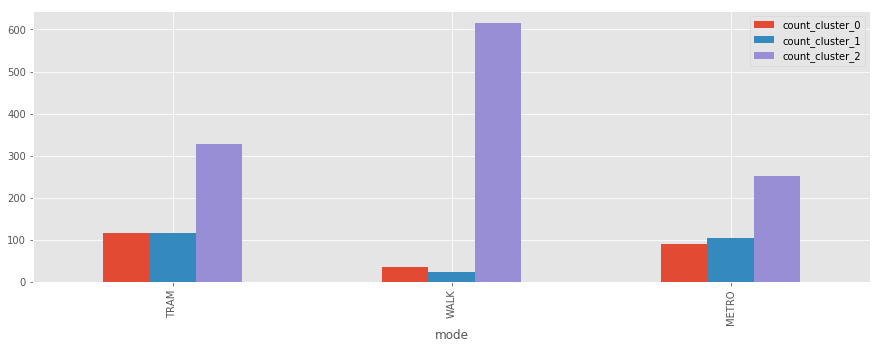

In [15]:
mode_dist_df.set_index("mode").plot(kind="bar",figsize=(15,5));

## Plot distribution of cluster labels for scripted and tokens

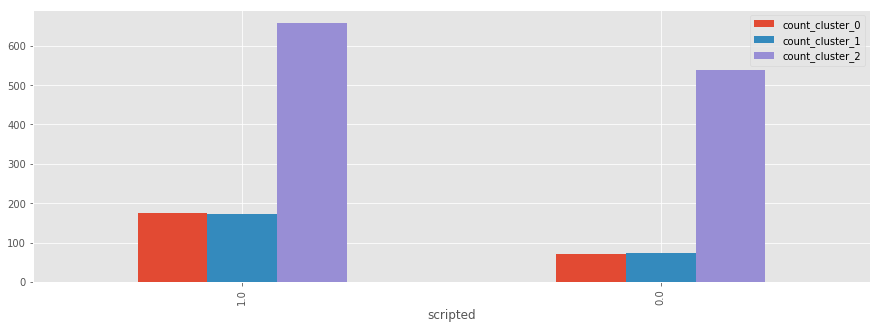

In [16]:
scripted_dist_df = get_distribution_of_cluster_labels_for("scripted", euclidean_distances)
scripted_dist_df.set_index("scripted").plot(kind="bar",figsize=(15,5));

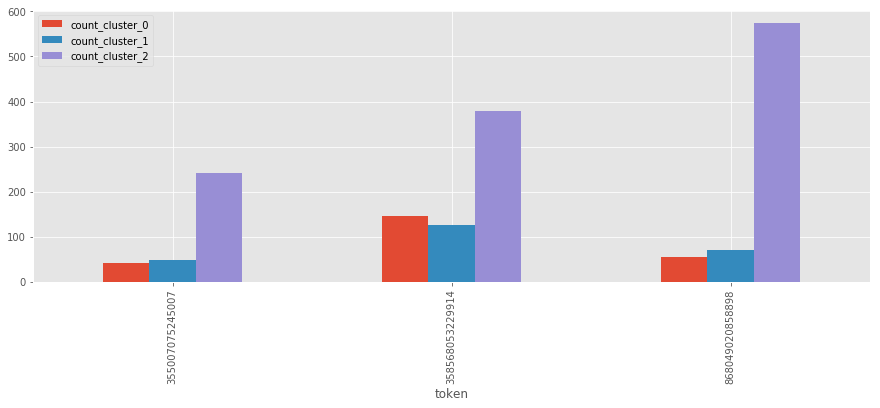

In [17]:
token_dist_df = get_distribution_of_cluster_labels_for("token", euclidean_distances)
token_dist_df.set_index("token").plot(kind="bar",figsize=(15,5));

## Plot all trips with their clustering labels

Produce this plot more conveniently by writing:

/Users/moritz/anaconda/envs/dm/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



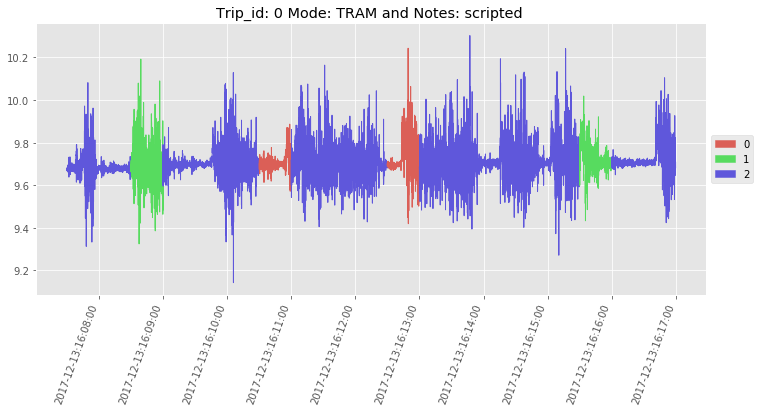

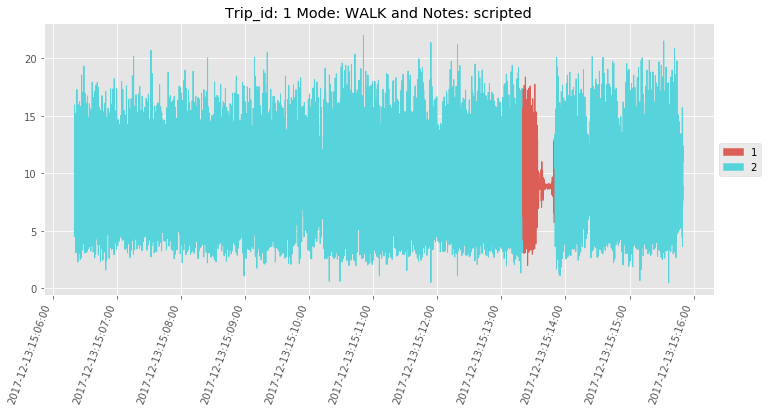

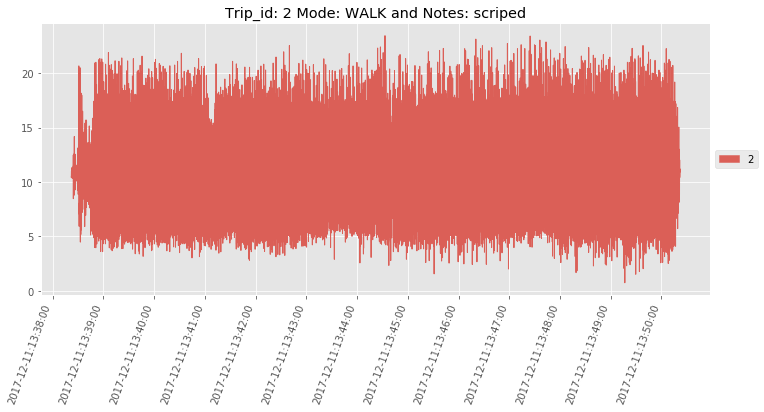

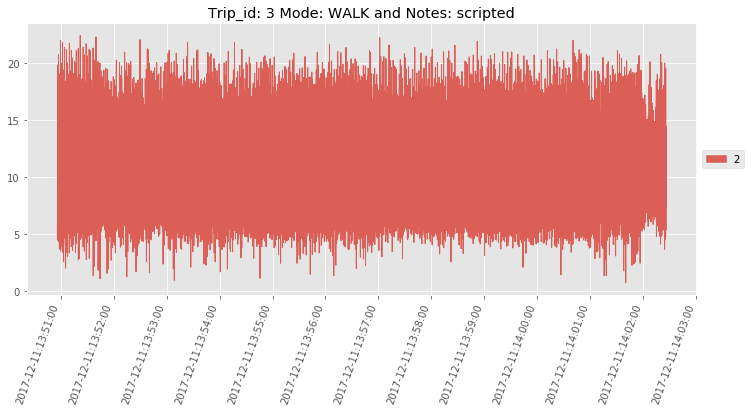

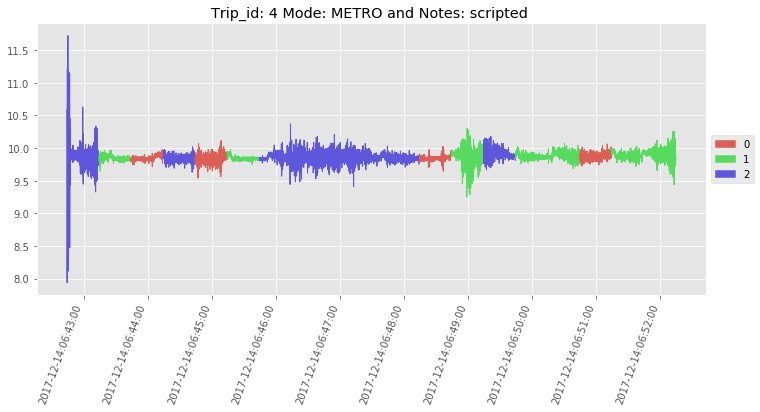

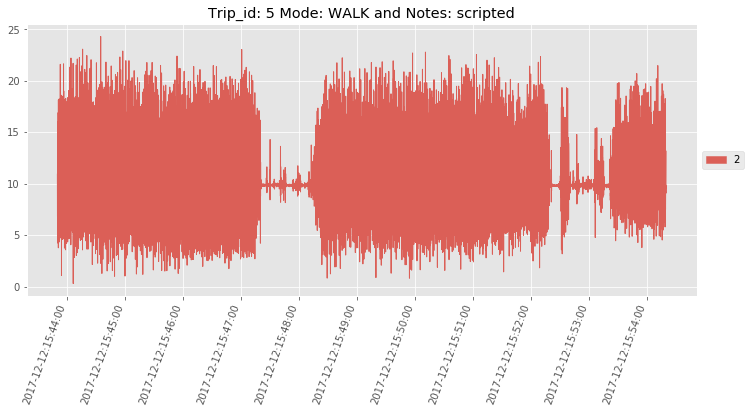

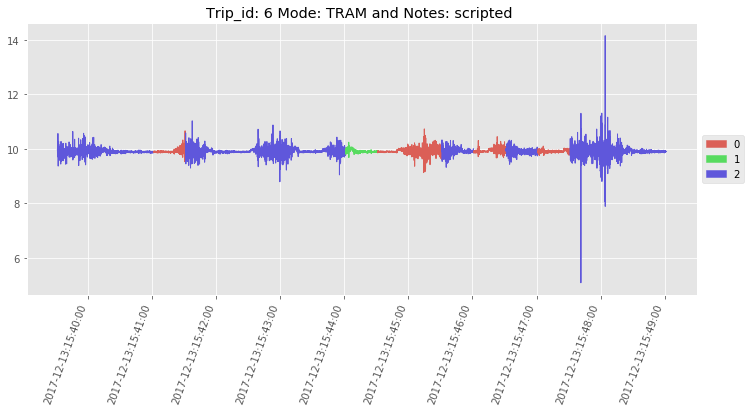

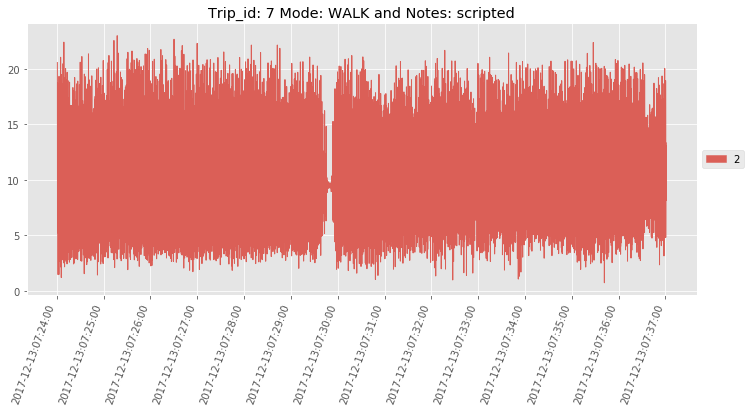

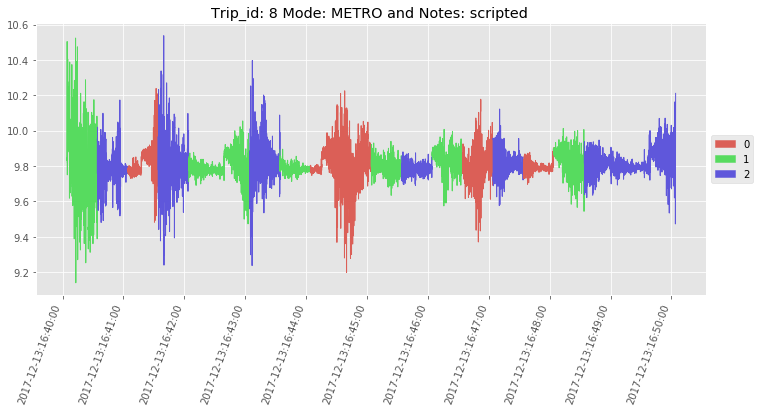

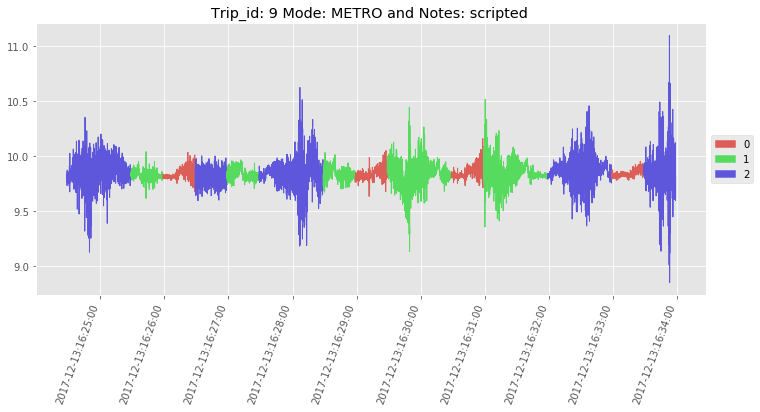

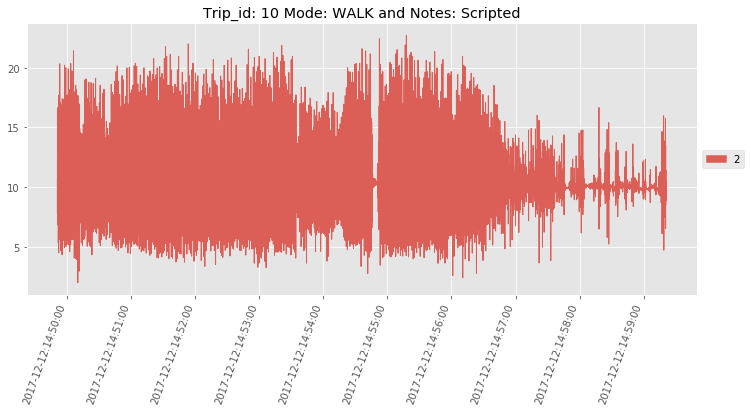

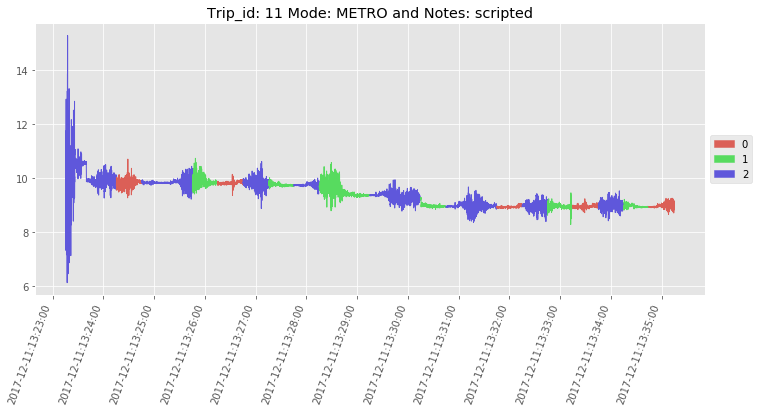

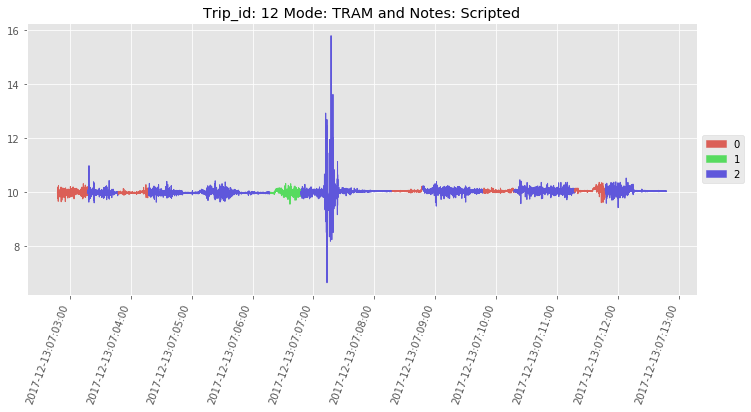

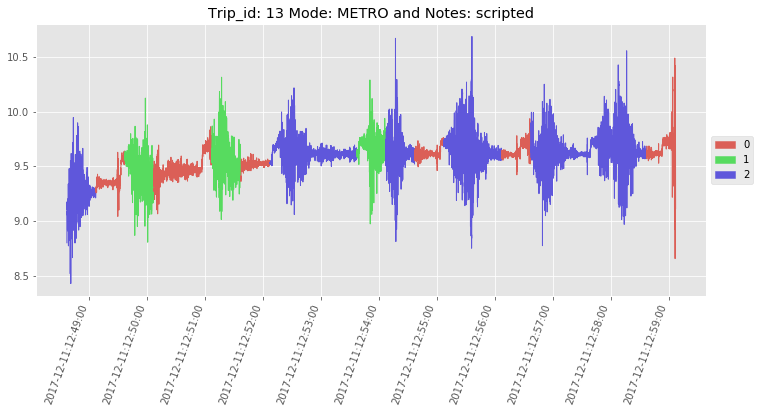

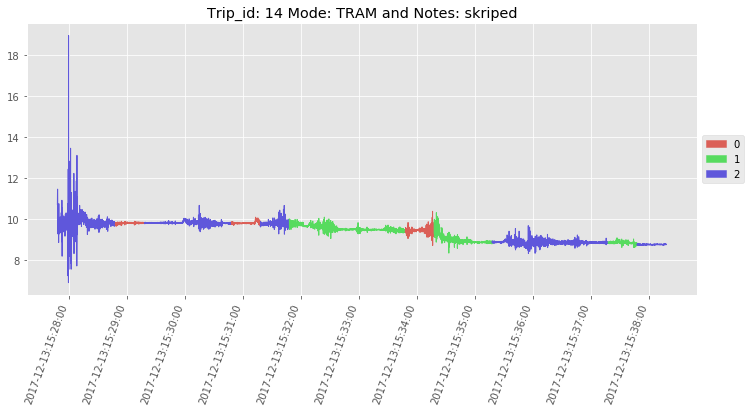

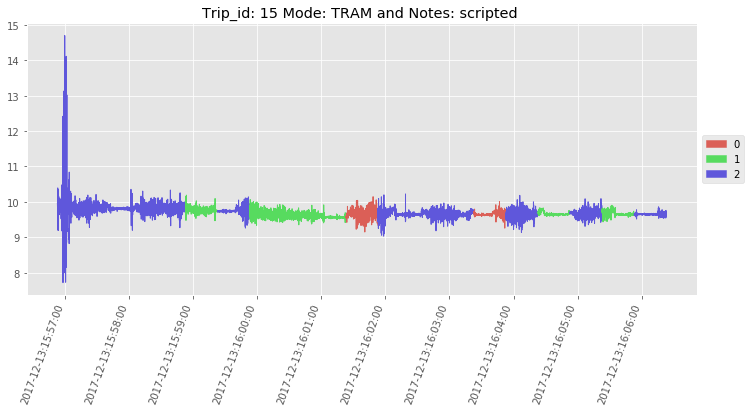

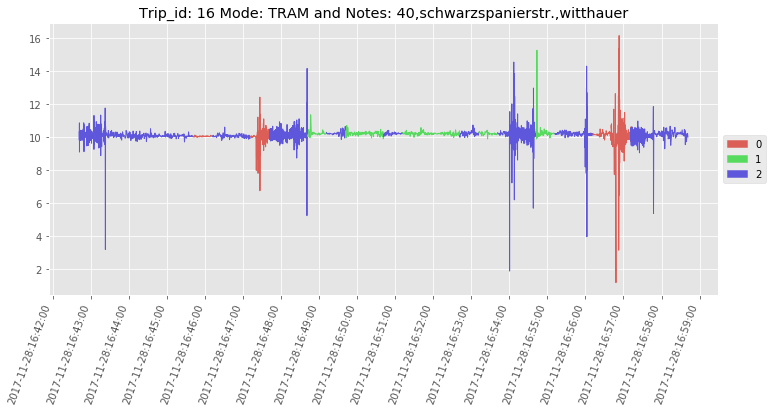

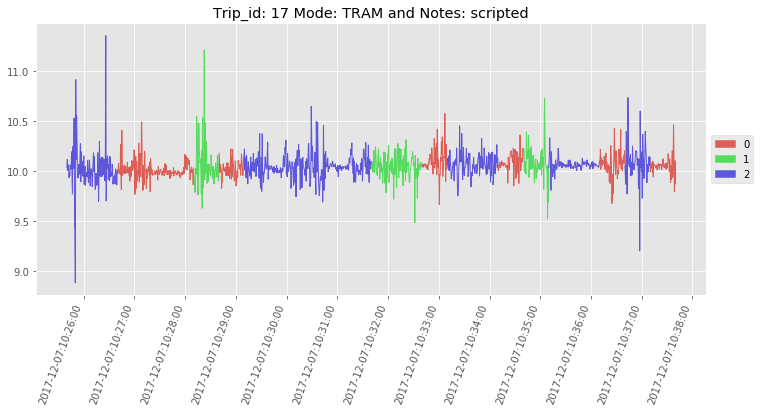

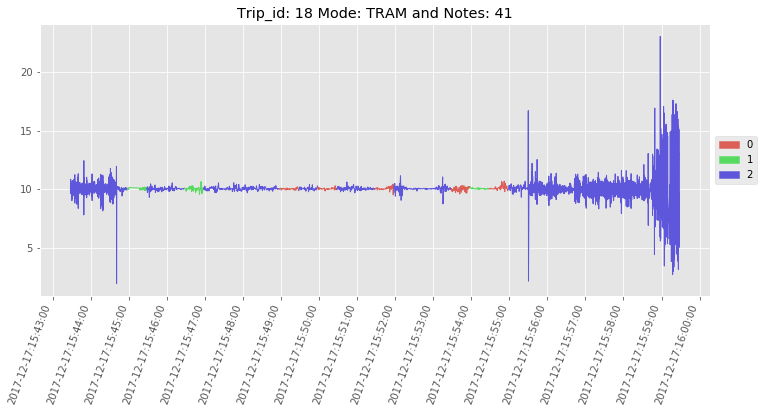

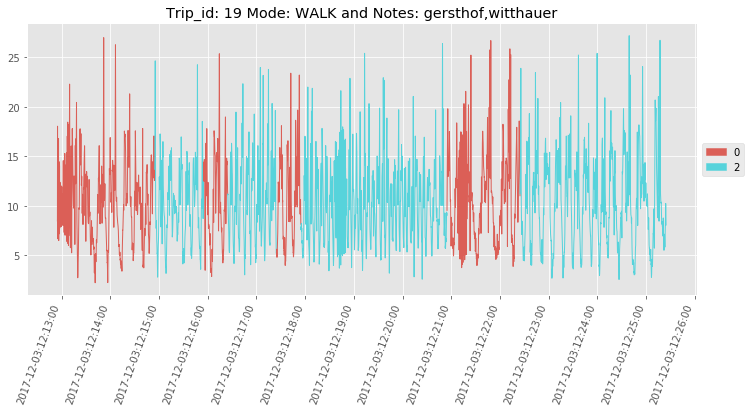

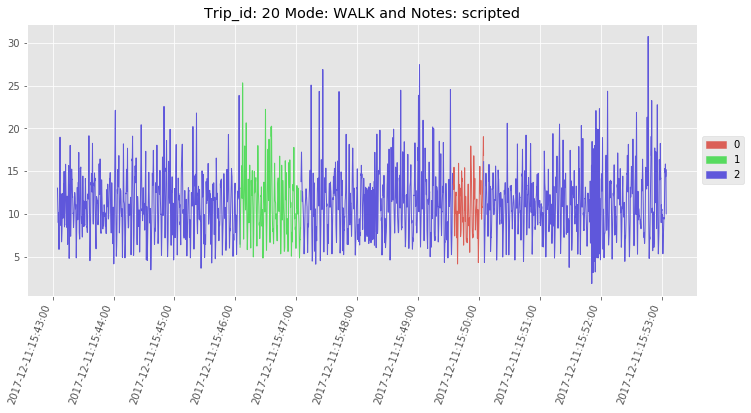

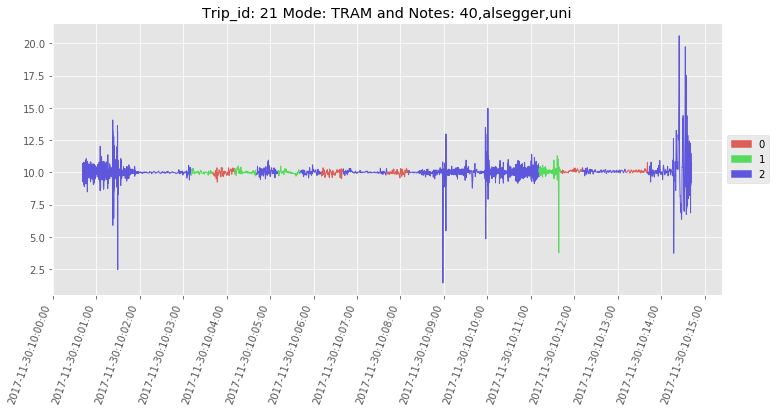

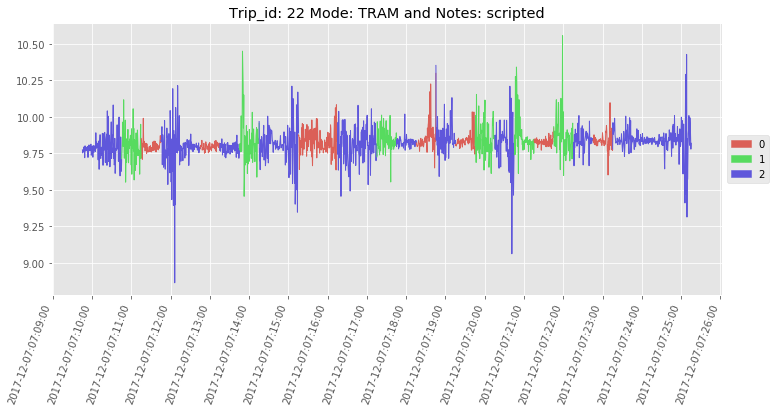

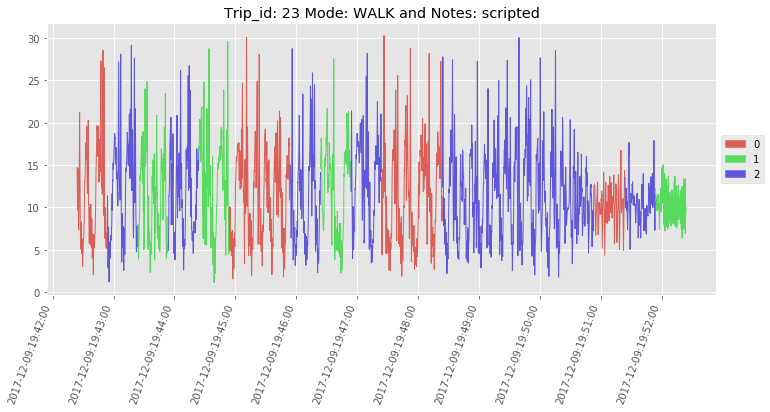

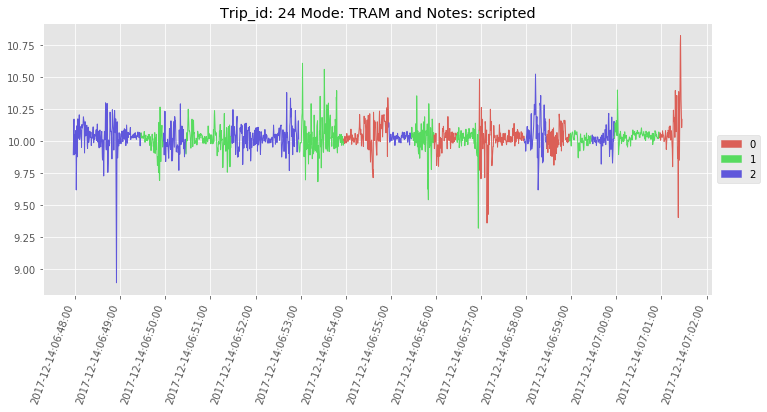

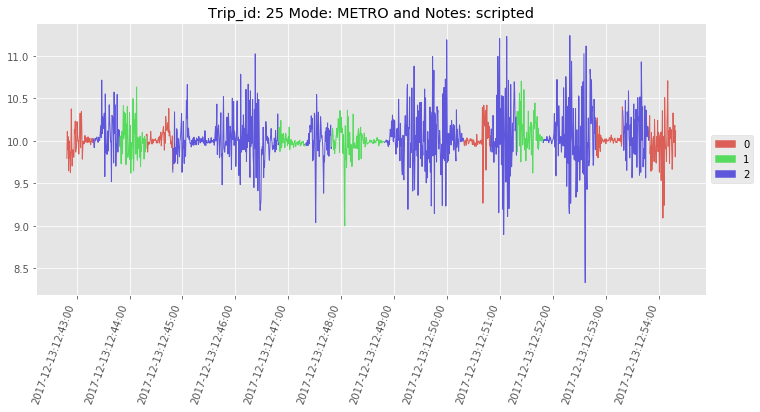

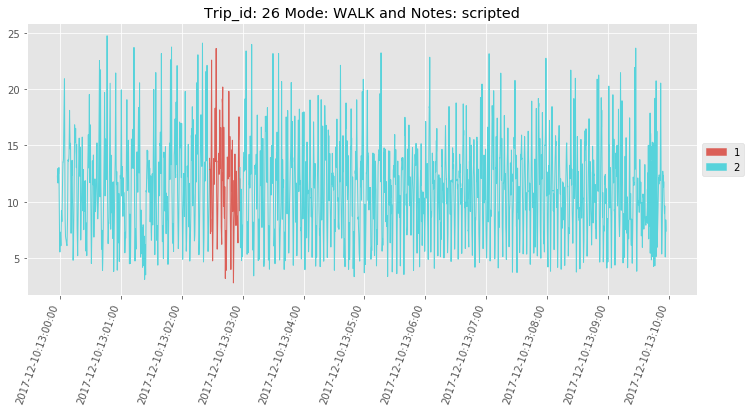

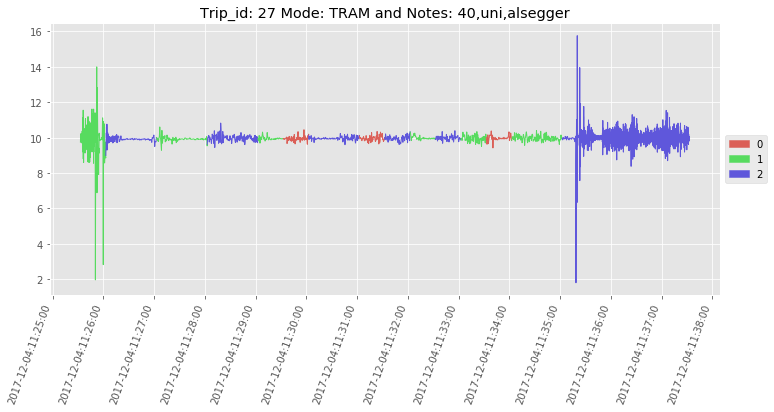

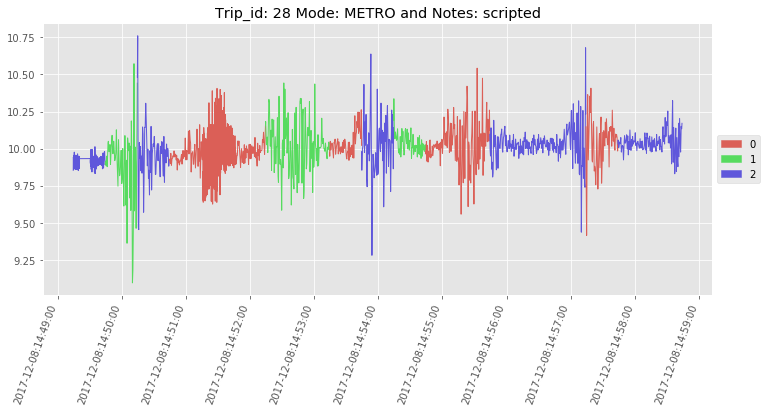

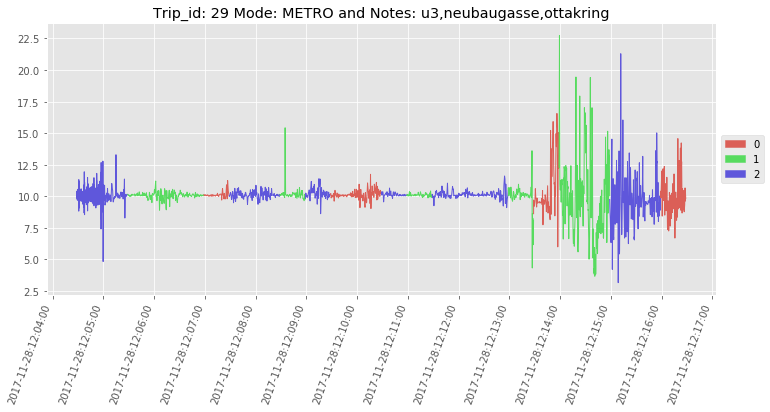

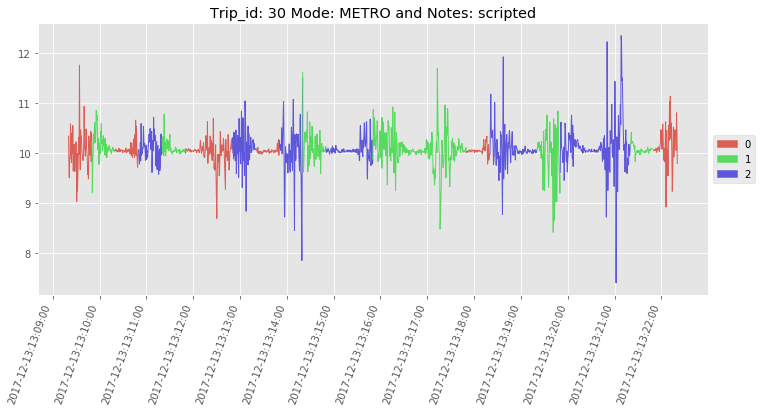

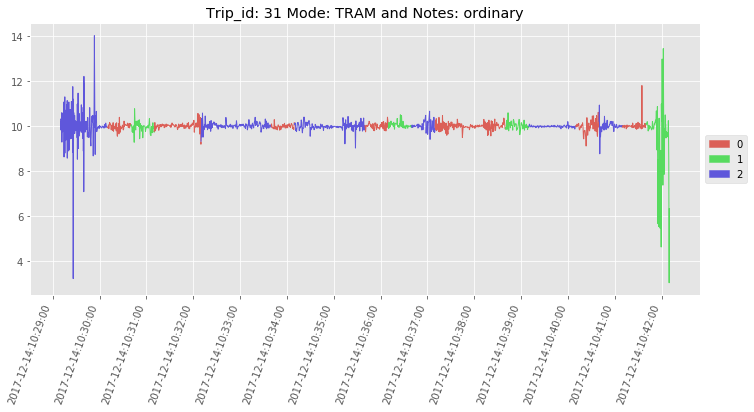

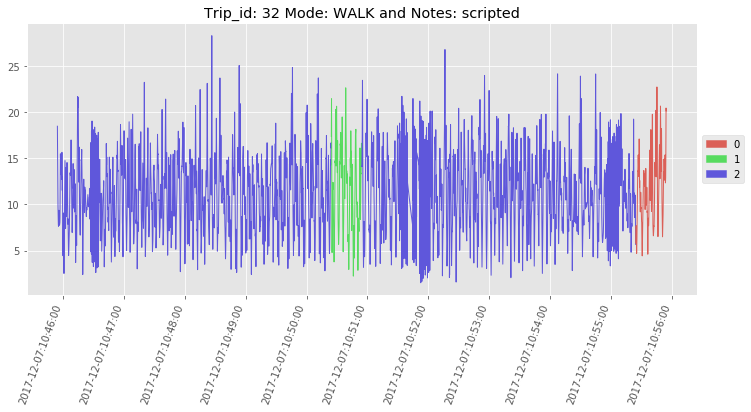

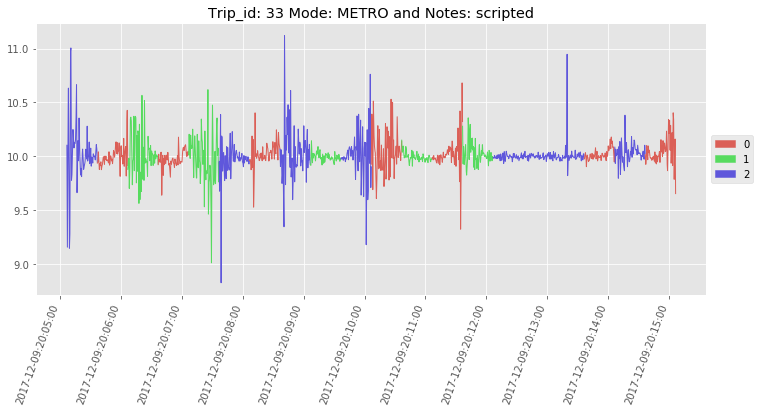

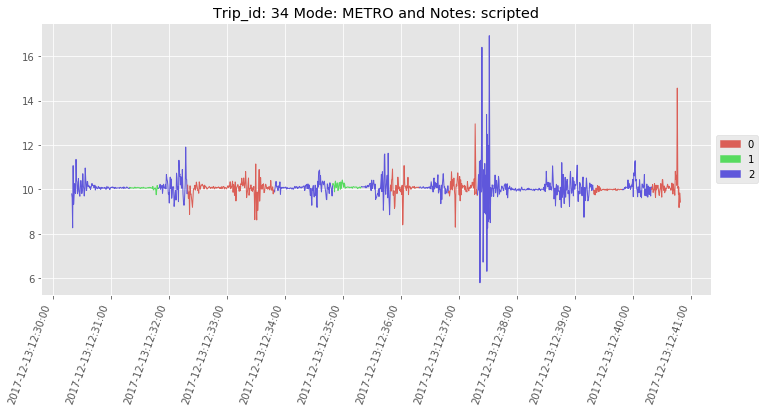

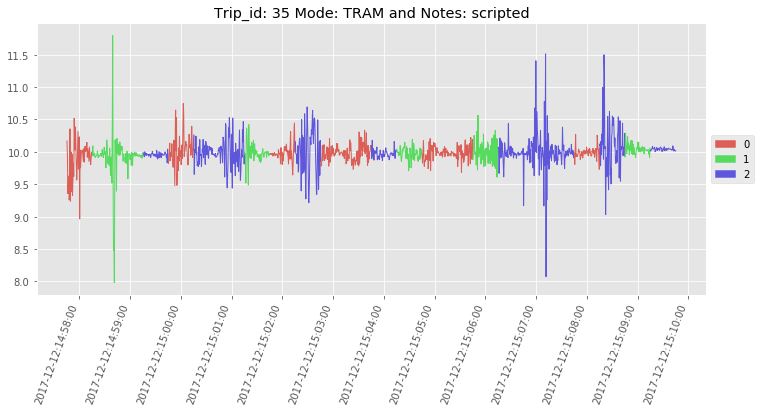

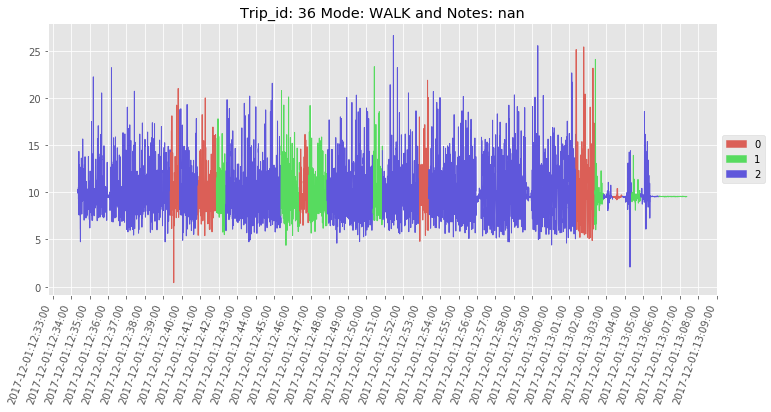

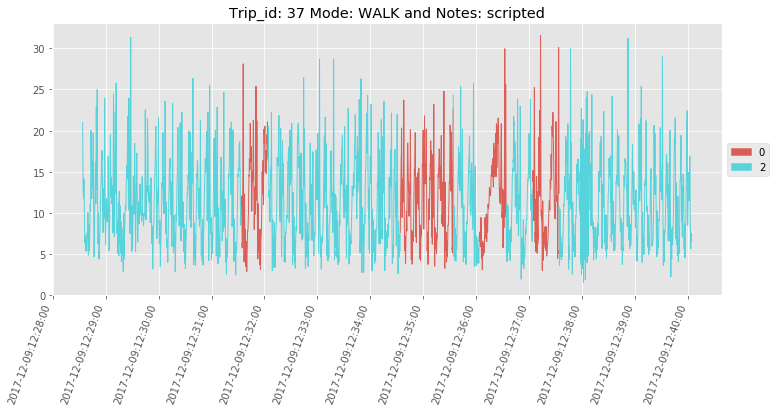

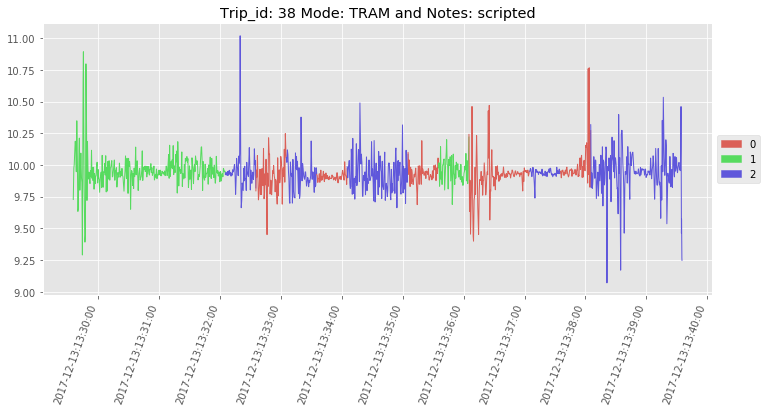

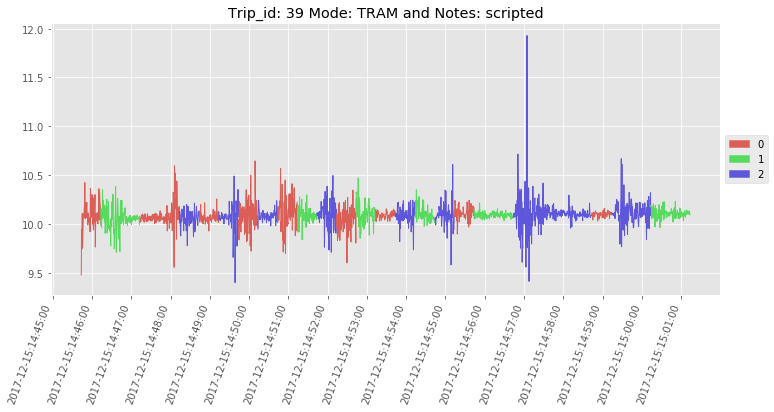

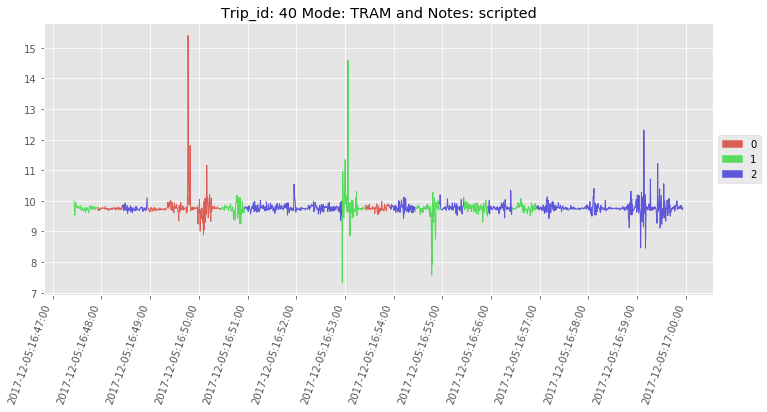

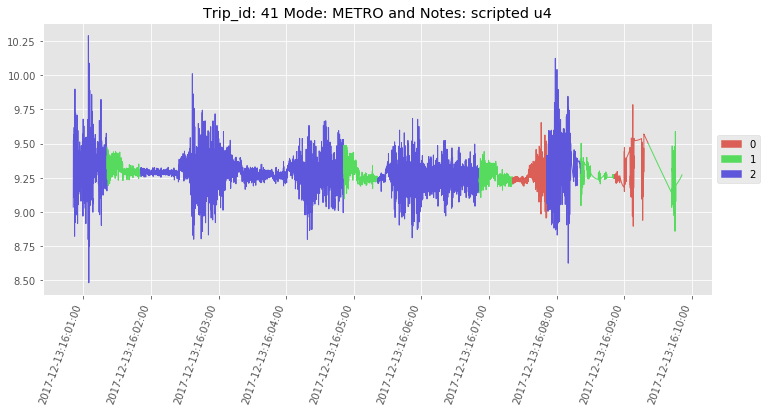

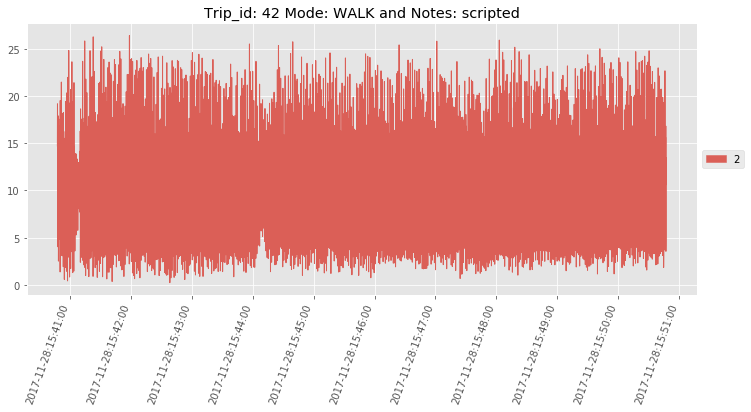

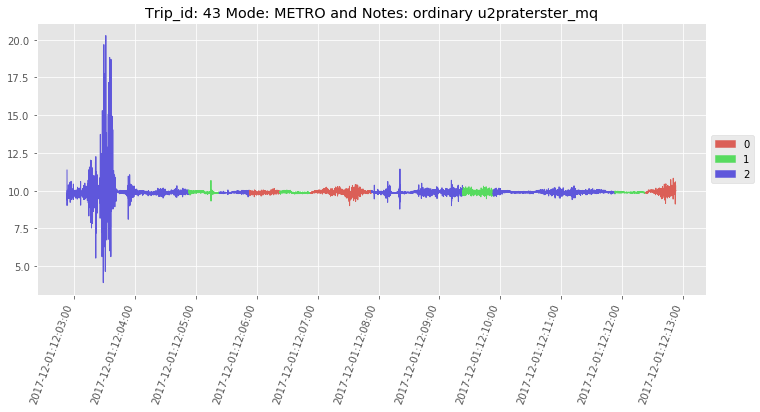

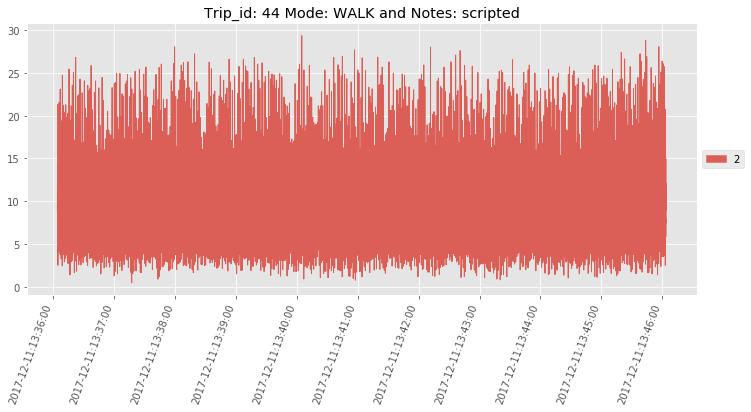

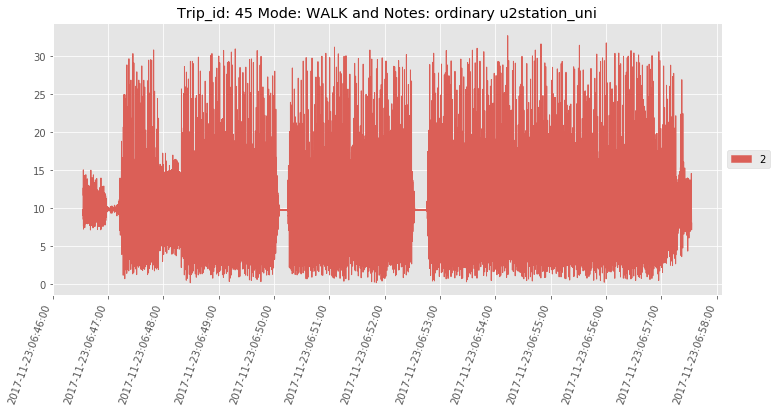

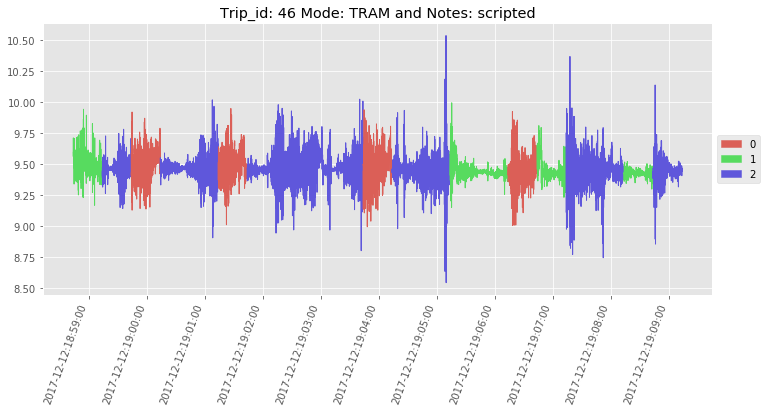

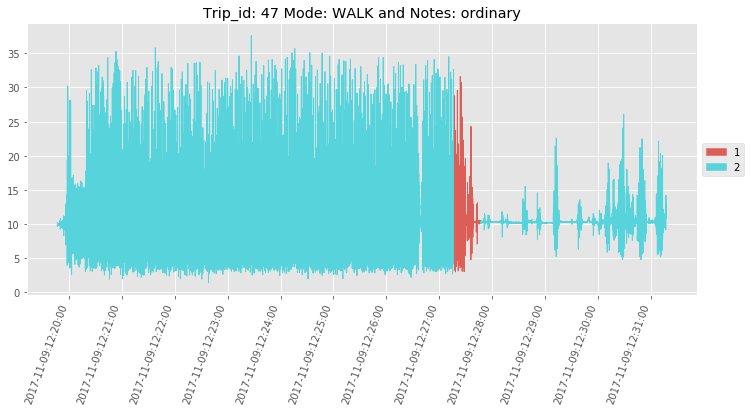

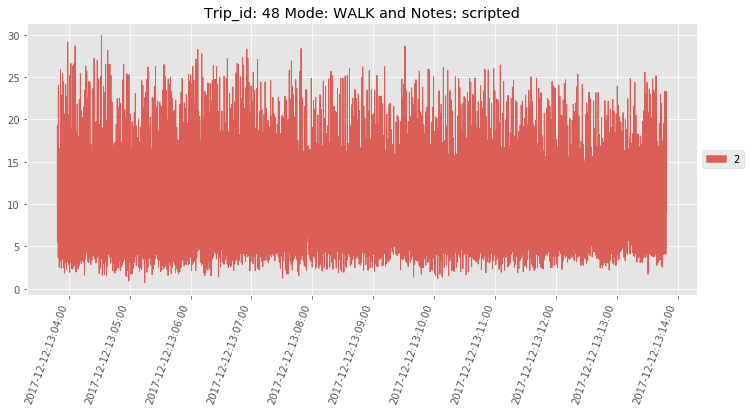

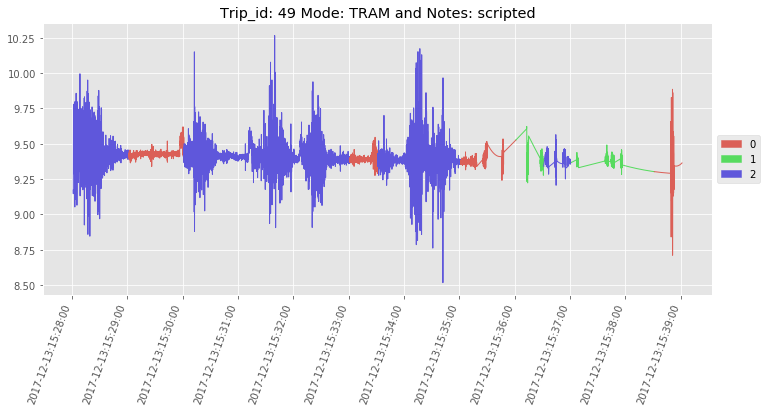

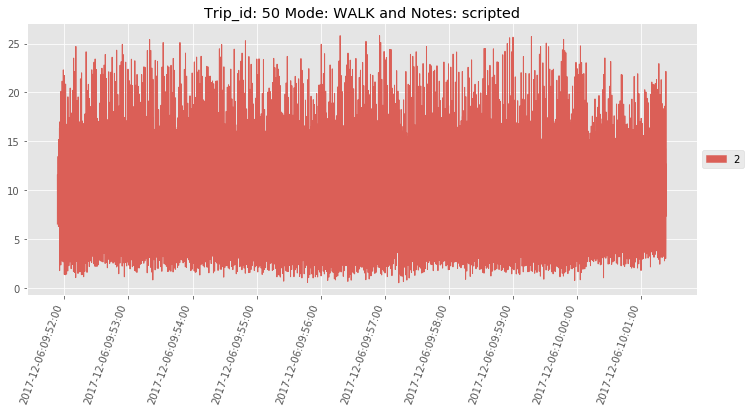

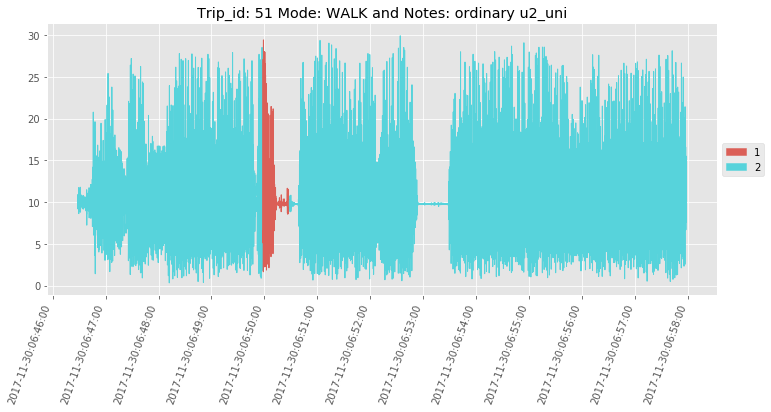

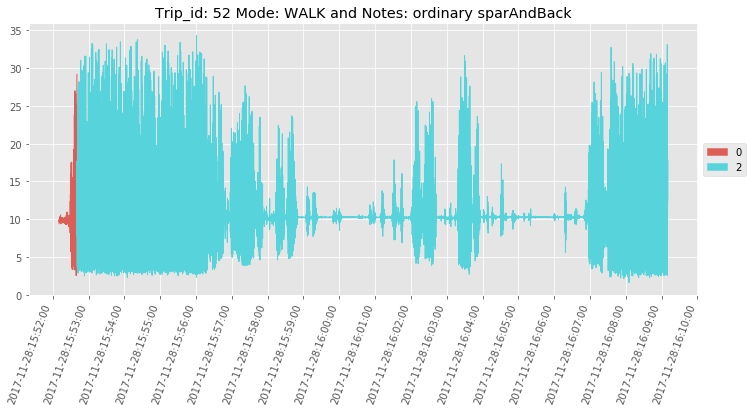

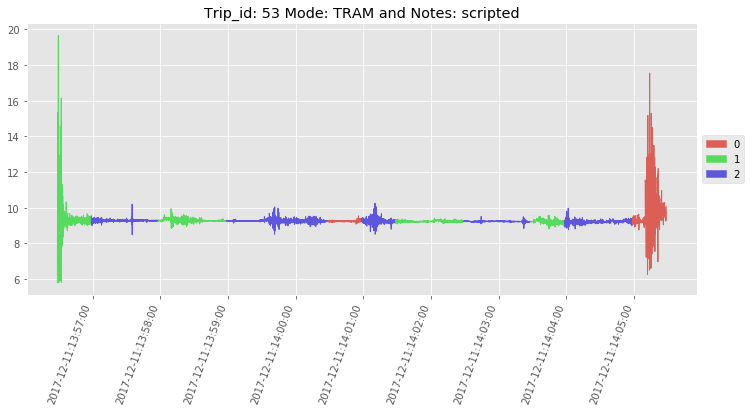

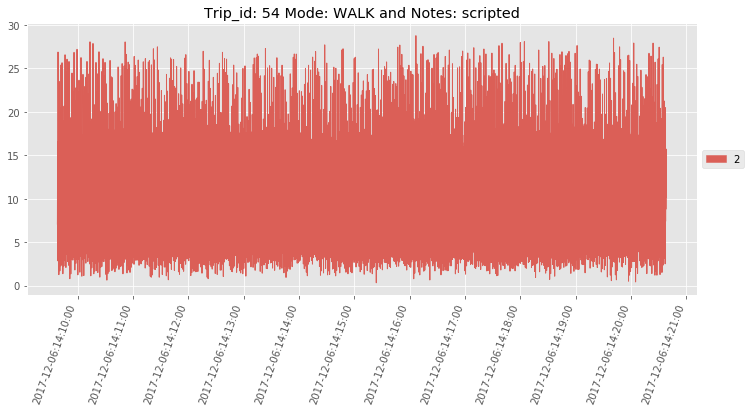

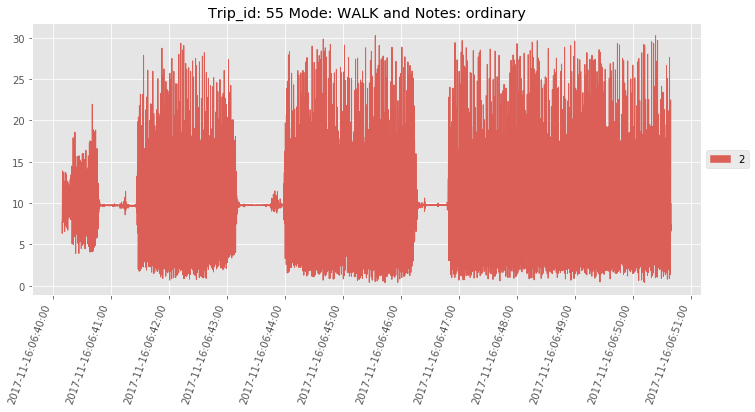

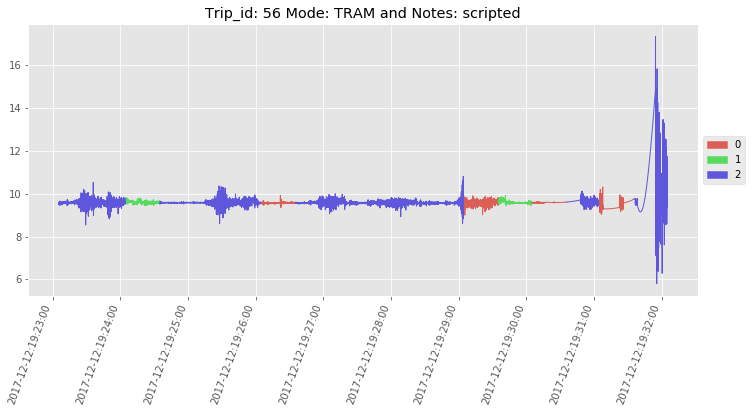

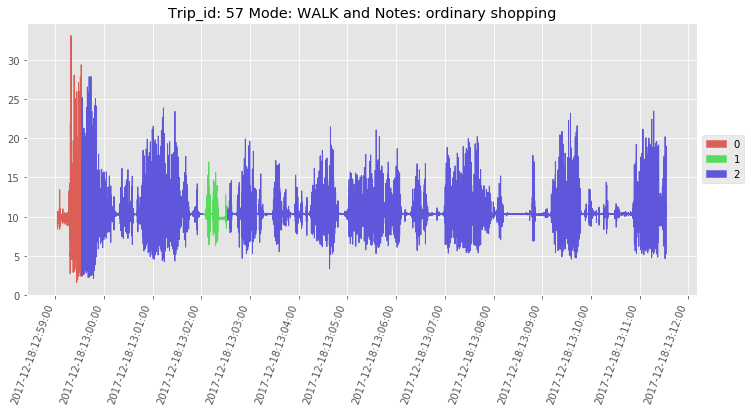

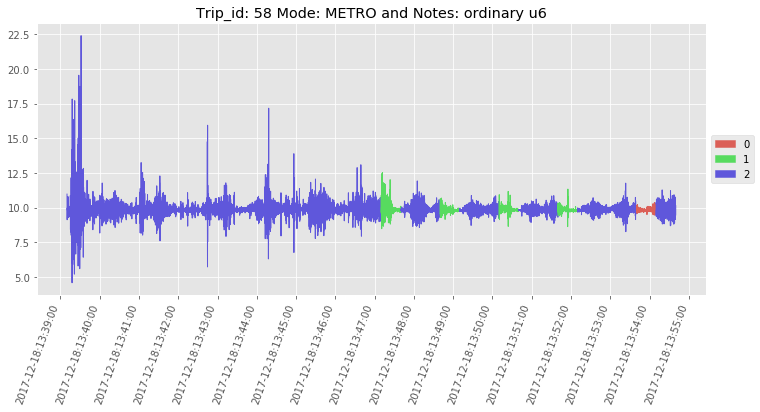

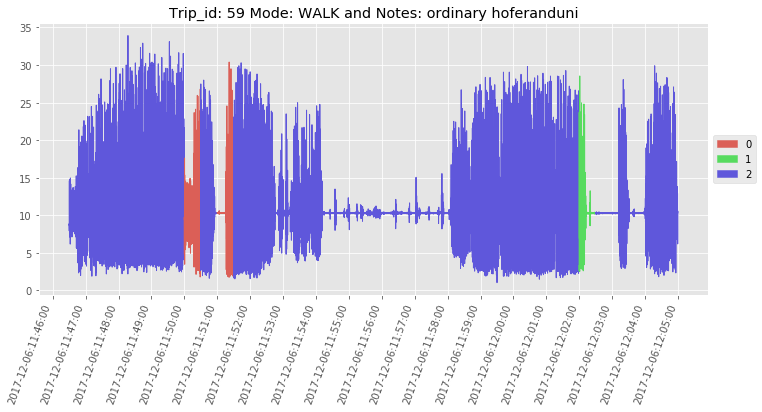

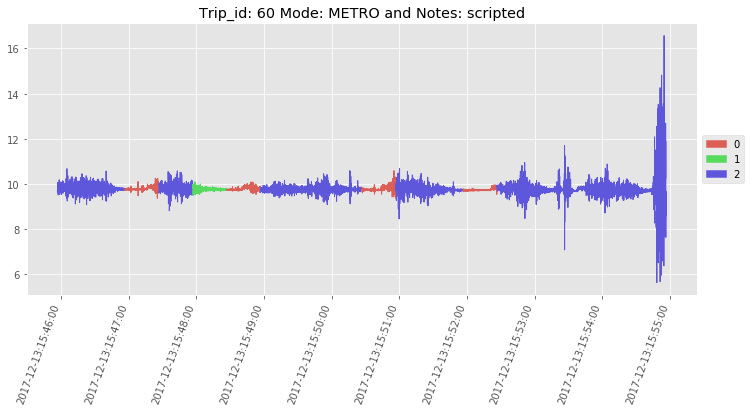

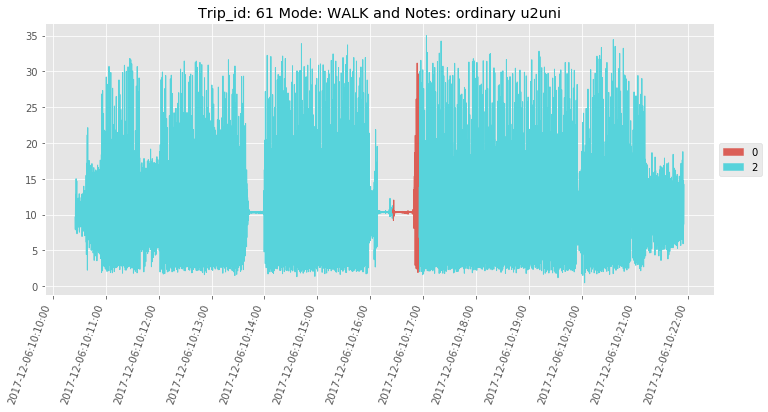

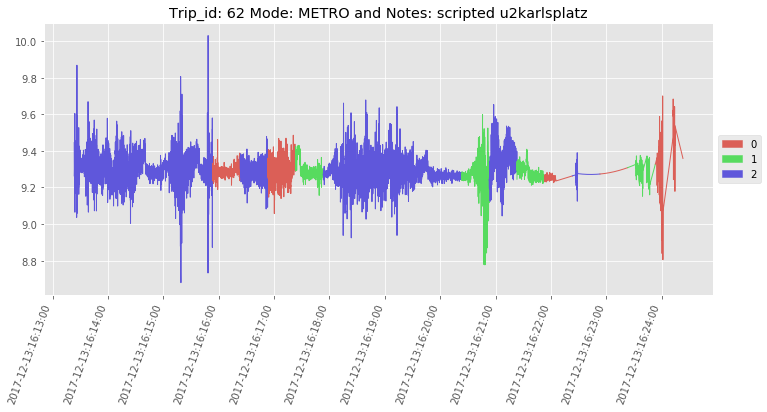

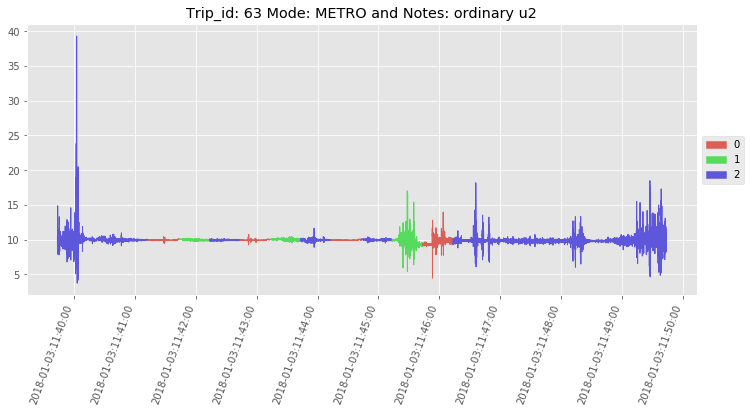

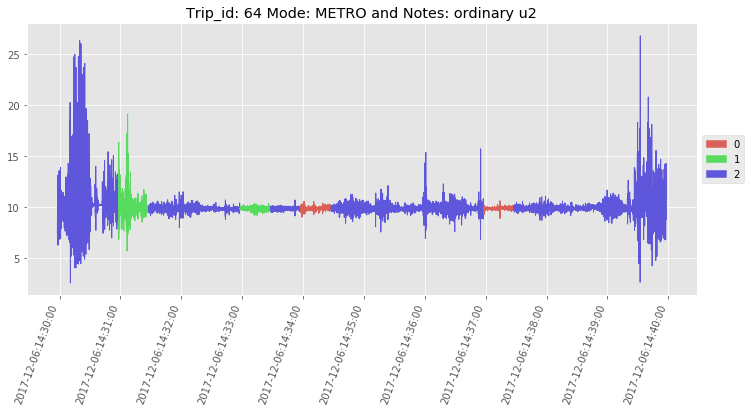

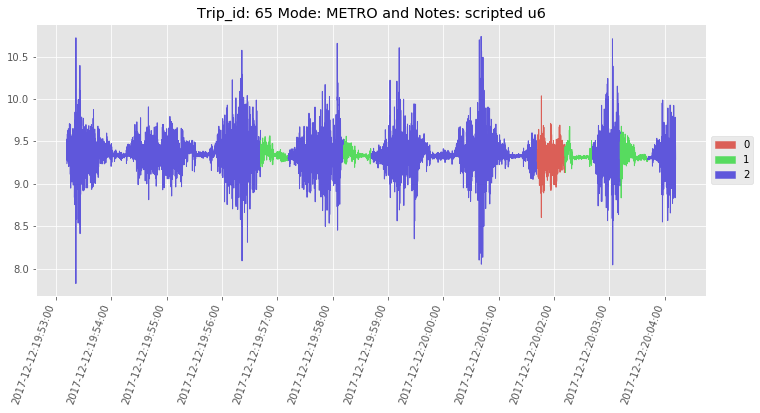

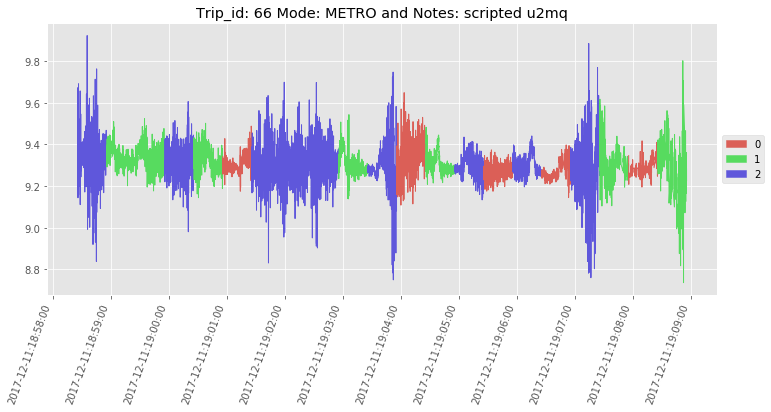

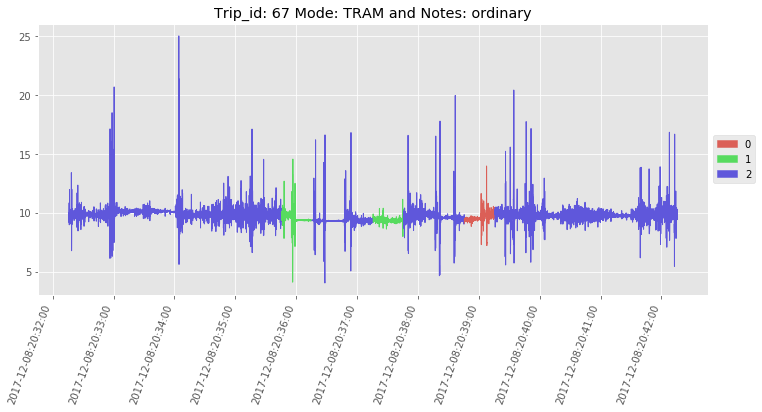

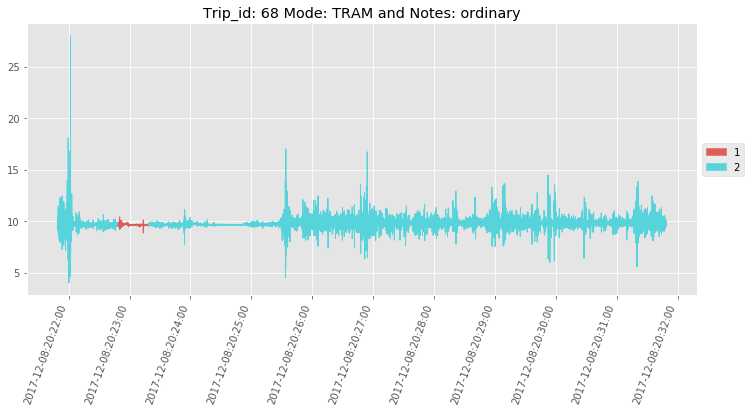

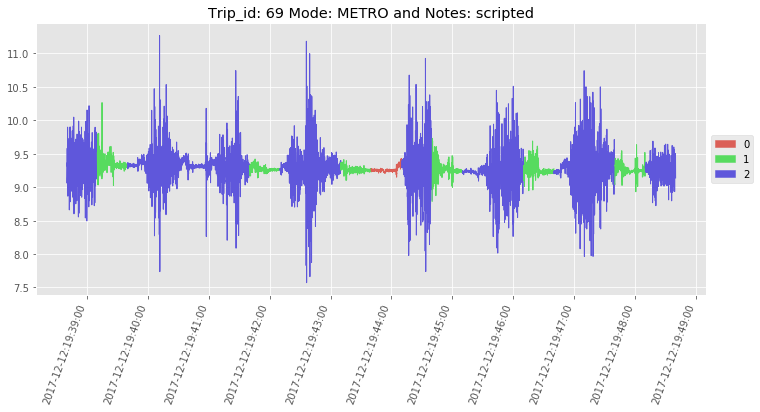

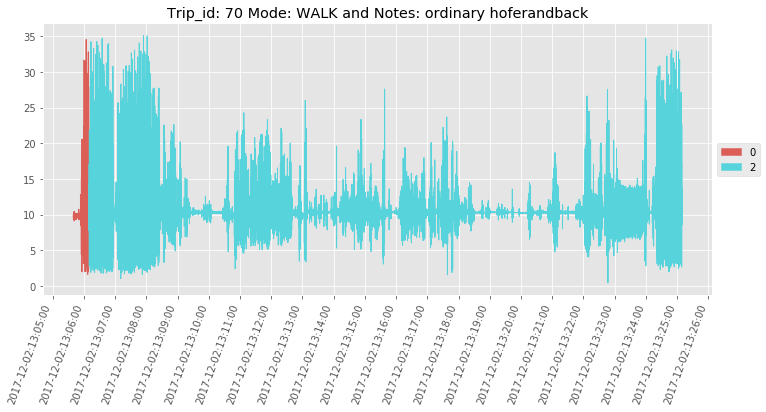

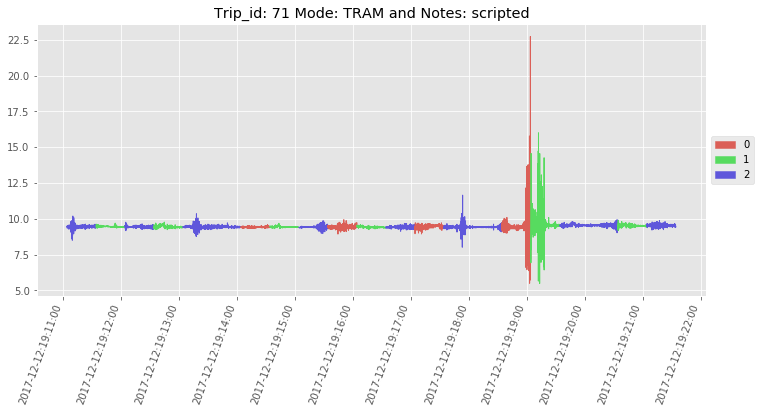

In [18]:

trip_ids = [i for i in euclidean_distances.trip_id.unique()]

for trip_id in trip_ids:
    time, total, labels = \
        get_plot_timeseries_clustering_variables(euclidean_distances,
                                                 trips_unpacked, 
                                                 trip_id, 
                                                 sensor_type="acceleration")


    mode = trips_unpacked[trip_id]["annotation"]["mode"][0]
    notes = trips_unpacked[trip_id]["annotation"]["notes"][0]

    title_format = "Trip_id: {} Mode: {} and Notes: {}"

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(title_format.format(trip_id,mode,notes))
    plot_timeseries_clustering(time,total, labels, ax=ax)